In [1]:
ls

bag_of_words-checkpoint.ipynb
bag_of_words.ipynb
cleaning-Copy1.ipynb
cleaning.ipynb
exploration.ipynb
final_model.ipynb
helper.py
helper.py.save
image_classifier_kevin.ipynb
label_mapping.csv
model-checkpoint.ipynb
model.ipynb
ocr_for_characters.ipynb
OCR for Street View Text - Research-checkpoint.ipynb
OCR for Street View Text - Research.ipynb
pair.ipynb
practice.ipynb
real_model_color_hog.ipynb
real_model_color.ipynb
test_data_split.csv
Untitled3-checkpoint.ipynb
Untitled.ipynb
Xtest.pkl
Xtrain.pkl


In [2]:
import cv2
import numpy as np
import os
from sklearn.svm import LinearSVC
from sklearn.externals import joblib
from scipy.cluster.vq import *
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from skimage import data
from skimage.feature import hog

%matplotlib inline
#from helper import *
import helper
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.cross_validation import StratifiedShuffleSplit
from functools import partial
import datetime
import pickle
import json

In [3]:
# sklearn models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import scale

# sklearn metrics
from sklearn.metrics import *
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
train_folder= '../data/train'
train_label='../data/trainLabels.csv'

In [6]:
pwd

u'/home/jshoun01/Data/kaggle/cifar10/analysis'

In [7]:
ls ../data

digits_testing.csv           test/
digits_training.csv          test.7z
digits_validation.csv        test_cifar_class.csv
label_mapping.csv            test_cifar_predicted_class.csv
label_mapping_just_name.csv  test_file_digits.csv
same_test_digits.csv         test_split_dir/
same_train_digits.csv        train/
same_train_digits.csv.save   train.7z
sampleSubmission.csv         train_file_digits.csv
simple_test.csv              train_file_digits_shuffled.csv
small_test.csv               trainLabels.csv


In [8]:
all_train_df= helper.get_cifar_training_data(train_folder,train_label)
all_train_df.head()

,id,label,filename,full_filename
0,1,frog,1.png,../data/train/1.png
1,2,truck,2.png,../data/train/2.png
2,3,truck,3.png,../data/train/3.png
3,4,deer,4.png,../data/train/4.png
4,5,automobile,5.png,../data/train/5.png


In [9]:
features=all_train_df[['id','filename','full_filename']]
labels=all_train_df['label']


In [10]:
train_img_gen=helper.load_images(features['full_filename'])

In [11]:
X_train_df,X_test_df,y_train,y_test= helper.get_stratified_train_test_split(
    features,labels)

In [12]:
X_train_df.head()

,id,filename,full_filename
1401,1402,1402.png,../data/train/1402.png
168,169,169.png,../data/train/169.png
46471,46472,46472.png,../data/train/46472.png
37950,37951,37951.png,../data/train/37951.png
26285,26286,26286.png,../data/train/26286.png


In [13]:
X_test_df.head()

,id,filename,full_filename
39264,39265,39265.png,../data/train/39265.png
18869,18870,18870.png,../data/train/18870.png
11313,11314,11314.png,../data/train/11314.png
26085,26086,26086.png,../data/train/26086.png
22976,22977,22977.png,../data/train/22977.png


In [14]:
cch_1= helper.ColorChannelStatistics(sub_regions=1)
cch_2= helper.ColorChannelStatistics(sub_regions=2)
cch_4= helper.ColorChannelStatistics(sub_regions=4)

cc_pipeline = FeatureUnion([("cch_1", cch_1),("cch_2", cch_2),("cch_4", cch_4)])
hog_pipeline= Pipeline([("gt", helper.GrayScaleImageTransform())
                        ,("ht", helper.HogStatistics())])

In [15]:
train_img_gen=helper.load_images(X_train_df['full_filename'])
test_img_gen=helper.load_images(X_test_df['full_filename'])


In [16]:
feature_extractors=[cc_pipeline,hog_pipeline]
#X_train=helper.extract_image_features(train_img_gen,feature_extractors)
#X_test=helper.extract_image_features(test_img_gen,feature_extractors)


In [17]:
X_train_df['full_filename'].ix[0]

'../data/train/1.png'

In [18]:
print(datetime.datetime.now())
X_train=helper.extract_multiple_image_features(feature_extractors,X_train_df['full_filename'])
print(datetime.datetime.now())

2015-08-07 09:59:23.249022
2015-08-07 10:10:12.642098


In [19]:
print(datetime.datetime.now())
X_test=helper.extract_multiple_image_features(feature_extractors,X_test_df['full_filename'])
print(datetime.datetime.now())

2015-08-07 10:10:12.669057
2015-08-07 10:15:29.866484


In [20]:
pickle.dump(X_train,open('Xtrain.pkl',"wb"))
pickle.dump(X_test,open('Xtest.pkl',"wb"))

In [21]:
X_train = pickle.load(open('Xtrain.pkl',"rb"))
X_test = pickle.load(open('Xtest.pkl',"rb"))

In [22]:
len(X_train)

35000

In [23]:
X_train[0]

array([[  7.75830078e+01,   4.24613904e+01,   9.44482422e+01,
          4.64459874e+01,   8.43085938e+01,   5.09237950e+01,
          8.41171875e+01,   3.33083654e+01,   1.02320312e+02,
          4.55013622e+01,   5.87500000e+01,   3.96352510e+01,
          6.51445312e+01,   3.60149520e+01,   1.02378906e+02,
          3.66605121e+01,   1.24386719e+02,   5.48591490e+01,
          6.92031250e+01,   3.46465094e+01,   8.18242188e+01,
          3.63198191e+01,   8.42851562e+01,   3.60299454e+01,
          1.08230469e+02,   5.10742949e+01,   6.93554688e+01,
          5.44265077e+01,   7.53632812e+01,   5.12647545e+01,
          1.18562500e+02,   2.43149099e+01,   4.68750000e+01,
          2.02403526e+01,   7.54375000e+01,   4.18519993e+01,
          3.47812500e+01,   1.28749621e+01,   1.08953125e+02,
          4.30226792e+01,   5.27500000e+01,   3.36976446e+01,
          8.55156250e+01,   2.97184666e+01,   8.74218750e+01,
          3.15276687e+01,   1.17468750e+02,   3.56339764e+01,
        

In [24]:
X_train_simp=map(lambda x:x[0], X_train)
X_test_simp=map(lambda x:x[0], X_test)

In [25]:
models = {'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5), 
          'Gaussian Naive Bayes': GaussianNB(),
          'Random Forest Classifier': RandomForestClassifier(),
          'Bernoulli Naive Bayes': BernoulliNB(),
          'Support Vector Machine': SVC()
         }

Accuracy Score: 0.416333333333


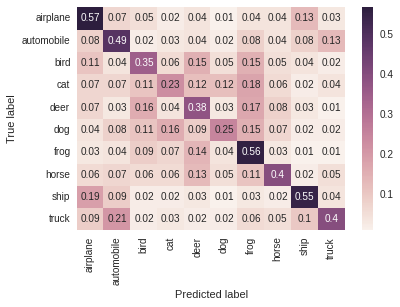

In [26]:
kn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train_simp, y_train)
helper.plot_confusion_matrix(kn_model,y_test,X_test_simp,file_name='../visuals/knn__color_hog_cm.json')


Accuracy Score: 0.480733333333


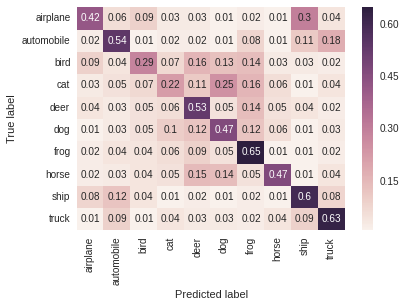

In [27]:
gnb_model=GaussianNB().fit(X_train_simp, y_train)
helper.plot_confusion_matrix(gnb_model,y_test,X_test_simp,file_name='../visuals/gnb__color_hog_cm.json')


Accuracy Score: 0.406866666667


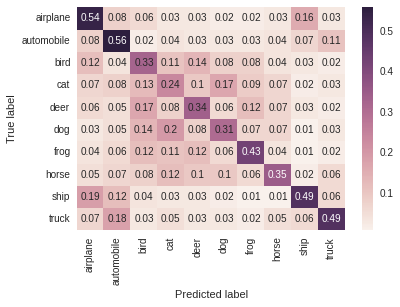

In [28]:
rf_model=RandomForestClassifier().fit(X_train_simp, y_train)
helper.plot_confusion_matrix(rf_model,y_test,X_test_simp,file_name='../visuals/rf__color_hog_cm.json')



Accuracy Score: 0.481466666667


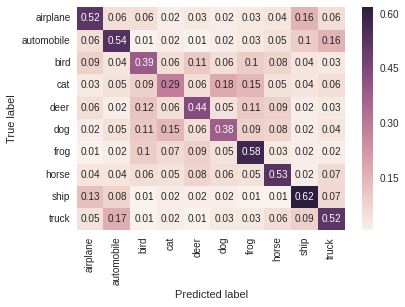

In [29]:
lr_model=LogisticRegression().fit(X_train_simp, y_train)
helper.plot_confusion_matrix(lr_model,y_test,X_test_simp,file_name='../visuals/lr__color_hog_cm.json')


In [30]:
ls

bag_of_words-checkpoint.ipynb
bag_of_words.ipynb
cleaning-Copy1.ipynb
cleaning.ipynb
exploration.ipynb
final_model.ipynb
helper.py
helper.pyc
helper.py.save
image_classifier_kevin.ipynb
label_mapping.csv
model-checkpoint.ipynb
model.ipynb
ocr_for_characters.ipynb
OCR for Street View Text - Research-checkpoint.ipynb
OCR for Street View Text - Research.ipynb
pair.ipynb
practice.ipynb
real_model_color_hog.ipynb
real_model_color.ipynb
test_data_split.csv
Untitled3-checkpoint.ipynb
Untitled.ipynb
Xtest.pkl
Xtrain.pkl
